EXPLORATORY DATA ANALYSIS

Load library

In [ ]:
### Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import folium
from datetime import datetime

Reading in Data from CSV

In [ ]:
#Importing the data
df_loan = pd.read_csv("loan_data_2007_2014.csv", on_bad_lines='skip', sep = ';')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10948\947561558.py:2: DtypeWarning: Columns (1,5,20,25,26,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,47,50,54,56,57,59,60,61,62,63,64,66,67,69,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("loan_data_2007_2014.csv", on_bad_lines='skip', sep = ';')


In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  object 
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  object 
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445219 non-null  object 
 13 

In [ ]:
print(f'There are a total of {len(df_loan.columns)} columns by default.')

There are a total of 75 columns by default.


In [ ]:
df_loan.shape

(466285, 75)

In [ ]:
df_loan.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
### Identifying contents of data( data types, shape, descriptive statistics, etc)
miss_data = df_loan.isna()
miss_data_amount = miss_data.sum().sum()
print(f'There are {miss_data_amount} missing values in the Lending Club dataset.')

There are 9932774 missing values in the Lending Club dataset.


In [ ]:
df_type = df_loan.dtypes.value_counts(normalize=True).rename_axis('type').to_frame('counts')

In [ ]:
df_type

,counts
type,
object,0.786667
float64,0.160000
int64,0.053333


<Axes: title={'center': 'Percetage of Loan Data Type'}, ylabel='counts'>

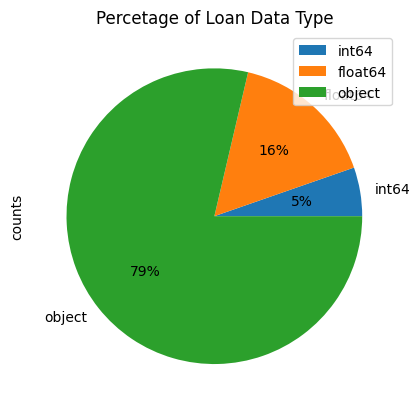

In [ ]:
df_type.groupby(['type']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%', title='Percetage of Loan Data Type')

The object types are not overly complex as the split is approximately 78% Float64, 16% Object, and 5% Integer. Since Machine Learning requires numeric inputs in order to function, it is a relief that there is not an overwhelming amount of Object (or any other non-numeric) data types for our 75 features.

In [ ]:
df_loan.describe()

,Unnamed: 0,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,mths_since_last_major_derog,policy_code,dti_joint,tot_coll_amt,total_bal_il,open_rv_24m,all_util,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,4.662230e+05,98514.000000,461427.000000,7.000000,3.937330e+05,6.000000,3.0,4.000000,1.0,0.0
mean,233142.000000,1.459766e+07,14317.277577,14291.801044,13.829236,432.061201,7.327603e+04,44.021507,1.094343,2941.701429,1.925280e+02,2411.561667,0.0,167.052500,0.0,NaN
std,134605.029472,1.168237e+07,8286.509164,8274.371300,4.357587,243.485550,5.496437e+04,236.098895,60.482876,4881.635219,1.467227e+04,2840.975385,0.0,332.772001,NaN,NaN
min,0.000000,7.047300e+04,500.000000,500.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,NaN
25%,116571.000000,4.379705e+06,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,26.000000,1.000000,0.000000,0.000000e+00,0.250000,0.0,0.750000,0.0,NaN
50%,233142.000000,1.194108e+07,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,42.000000,1.000000,0.000000,0.000000e+00,1655.595000,0.0,1.000000,0.0,NaN
75%,349713.000000,2.300154e+07,20000.000000,20000.000000,16.490000,566.580000,8.894350e+04,59.000000,1.000000,4829.895000,0.000000e+00,4254.470000,0.0,167.302500,0.0,NaN
max,466284.000000,4.086083e+07,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,59928.000000,41014.150000,10932.120000,9.152545e+06,6588.950000,0.0,666.210000,0.0,NaN


In [ ]:
avg_rate = df_loan['int_rate'].mean()
avg_rate = round((avg_rate),2)
print(f'The Average Interest Rate is: {avg_rate}%')

avg_loan = df_loan['loan_amnt'].mean()
avg_loan = round((avg_loan),2)
print(f'The Average Loan amount is: {avg_loan}$')

The Average Interest Rate is: 13.83%
The Average Loan amount is: 14317.28$


From the describe method, we can already verify there are multiple columns with many missing values. There are outliers present as well, specifically in annual_inc (Reported Annual Income). These will have to be dealt with before modeling. We can go ahead and immediately drop the id, member_id and url columns as they contain no information (useful or otherwise), verified by consulting the data dictionary. We can also see that there are individuals who have reported 0 annual income, which may be important moving forward merit further investigation.

Defining our target feature is a key element of the data science process, as our ability to generate successful predictions depends on how well we can define success and failure. To differentiate Good from Bad loans, target feature split the "Current" loans in the Success, or 1, class. Therefore, I choose to eliminate the "Current" loans from the dataset entirely as there is uncertainty as to whether they will end up being successes or failures and combine the 'Fully Paid' sections into 1 from the 'loan_status' column. If I included the "Current" and "In Grace Period" loans as others did- such as others did- then my model would suffer from a systematic increase in the risk of labeling True Negatives as Positive, resulting in False Positives. This would result in a two-fold loss on the part of the investors: firstly from their principal investment and secondly from the lost income from the interest payments. Then, combining remaining columns into 0, I define the Failure class for my machine learning model.

In [ ]:
loan = df_loan['loan_status'].value_counts(normalize=True).rename_axis('Loan Status').to_frame('Counts')
loan

,Counts
Loan Status,
Current,0.480873
Fully Paid,0.396193
Charged Off,0.091093
Late (31-120 days),0.014800
In Grace Period,0.006748
Does not meet the credit policy. Status:Fully Paid,0.004264
Late (16-30 days),0.002612
Default,0.001785
Does not meet the credit policy. Status:Charged Off,0.001632


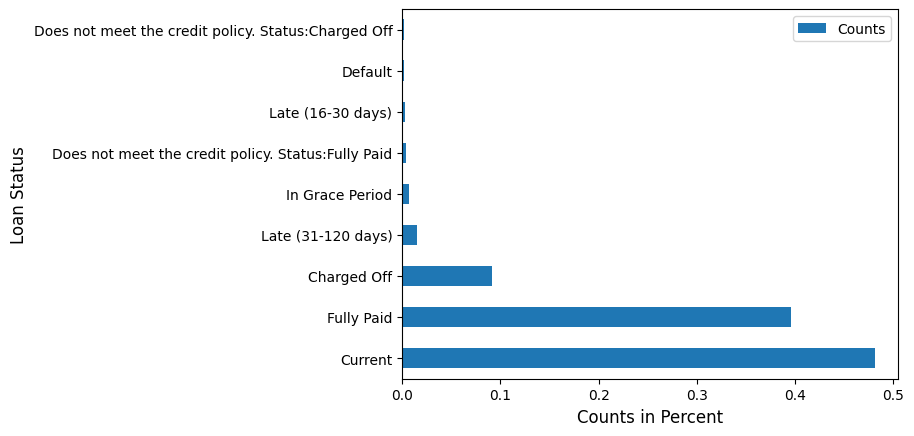

In [ ]:
loan.plot(kind="barh")
plt.xlabel('Counts in Percent', size= 12);
plt.ylabel('Loan Status', size= 12);

One interesting finding is that there is a drastically lower Default percentage than I assumed. This is most likely due to the prevalence of restructuring loans, in order to pad the numbers of Lending Company and present the best foot forward for potential investors- in both the loans themselves and the company's stock. The fact that 'Current' and 'In Grace Period' account for more than 70% of the data is unfortunate, but for the reasons discussed before it is necessary to remove them. The remaining amount of data, approximately 300,000 loans, is more than enough for our needs so it is not a large concern.

In [ ]:
#applying the class definitions to the columns
df_loan = df_loan.dropna(subset=['loan_status'])

#using masking to exclude all loans that include 'Current' and 'In Grace Period' text in the fields
df_loan = df_loan[df_loan['loan_status'] != 'Current']
df_loan = df_loan[df_loan['loan_status'] != 'In Grace Period']

#after dropping 'Current' and 'In Grace Period' the lambda function makes the rest of it easy!
df_loan['classes'] = df_loan['loan_status'].apply(lambda x: 1 if 'Fully Paid' in x else 0)

In [ ]:
classes = df_loan['classes'].value_counts(normalize=True)
classes

1    0.781564
0    0.218436
Name: classes, dtype: float64

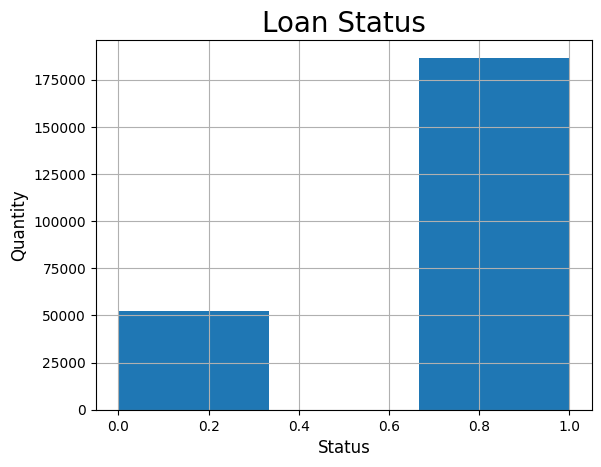

In [ ]:
df_loan['classes'].hist(bins=3)
plt.title('Loan Status', size=20);
plt.xlabel('Status', size= 12);
plt.ylabel('Quantity', size=12);

After performing the feature engineering for the classes, it is apparent that the classes are imbalanced. I will have to normalize them in order to get a better predictive capacity for Accuracy or I can use other metrics to determine model quality.

Dropping specific columns

In [ ]:
df_loan.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
total_rev_hi_lim     68097
inq_fi              238884
total_cu_tl         238884
inq_last_12m        238885
classes                  0
Length: 76, dtype: int64

In [ ]:
df_loan.isnull().sum().sum()

5322150

In [ ]:
df_loan = df_loan.drop(columns= ['Unnamed: 0'])

In [ ]:
df_loan = df_loan.drop(columns= ['id', 'member_id', 'url', 'policy_code'])

In [ ]:
df_loan = df_loan.drop(columns=['loan_status'])

In [ ]:
df_loan = df_loan.drop(columns=['zip_code','sub_grade','last_credit_pull_d'])

In [ ]:
df_loan = df_loan.drop(columns=['last_pymnt_d', 'next_pymnt_d','total_bal_il', 'total_cu_tl',
                          'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                          'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'initial_list_status'])

In [ ]:
df_loan = df_loan.drop(columns=['all_util', 'open_acc_6m', 'inq_last_12m', 
                          'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 
                          'inq_fi', 'max_bal_bc', 'mths_since_last_major_derog',
                          'il_util', 'mths_since_rcnt_il'])

In [ ]:
df_loan = df_loan.drop(columns=['annual_inc_joint', 'dti_joint', 'verification_status_joint', 
                          'open_il_6m', 'mths_since_last_record', 'mths_since_last_delinq','tot_cur_bal','tot_coll_amt'])

In [ ]:
df_loan.shape

(238885, 36)

Checking Correlations

In [ ]:
corr_df_loan = df_loan.corr()
corr_df_loan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10948\943249827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df_loan = df_loan.corr()


,loan_amnt,funded_amnt,int_rate,installment,annual_inc,classes
loan_amnt,1.000000,0.997303,0.212974,0.955485,0.351735,-0.074631
funded_amnt,0.997303,1.000000,0.214903,0.959549,0.350585,-0.074945
int_rate,0.212974,0.214903,1.000000,0.202900,-0.019209,-0.255560
installment,0.955485,0.959549,0.202900,1.000000,0.348460,-0.055640
annual_inc,0.351735,0.350585,-0.019209,0.348460,1.000000,0.060572
classes,-0.074631,-0.074945,-0.255560,-0.055640,0.060572,1.000000


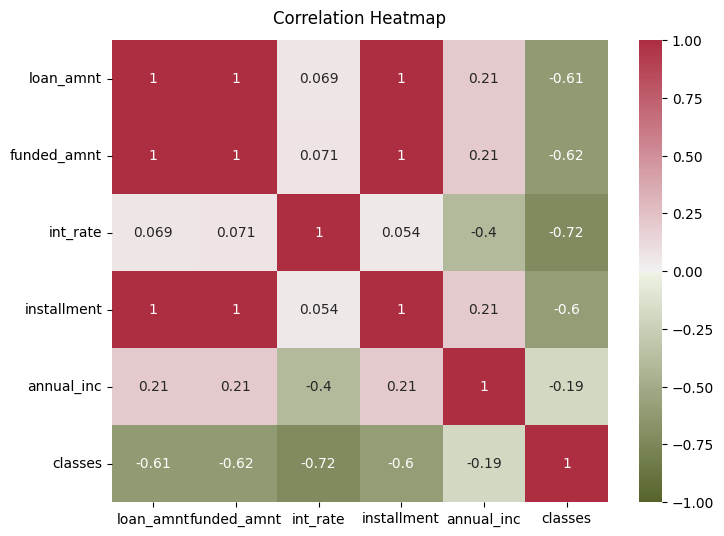

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
heatmap = sns.heatmap(corr_df_loan.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
df_loan.isnull().sum().sort_values(ascending=False)

desc                          146755
emp_title                      13478
emp_length                      9225
revol_util                      4138
collections_12_mths_ex_med      4054
open_acc                        3945
acc_now_delinq                  3944
delinq_2yrs                     3943
total_acc                       3942
pub_rec                         3941
earliest_cr_line                3941
inq_last_6mths                  3940
out_prncp                       3914
out_prncp_inv                   3913
last_pymnt_amnt                 3913
dti                             3913
addr_state                      3912
application_type                3912
revol_bal                       3911
recoveries                      3911
collection_recovery_fee         3911
title                           3904
purpose                         3886
annual_inc                         4
loan_amnt                          0
funded_amnt                        0
pymnt_plan                         0
i

The prevalence of missing values reveals some potential overlap in rows missing a majority of data. Hopefully, by removing one set of missing values in a column, this cleans the columns with nearly identical quantities. In particular, a cursory glance reveals that 15 features with a clustering around 3900 missing values

In [ ]:
df_loan['title'].value_counts()

Debt consolidation                  60147
Credit card refinancing             19490
Debt Consolidation                  11099
Home improvement                     5336
Other                                4904
                                    ...  
Finishing Off a Student Loan            1
Credit Card / Loan Consolidation        1
Travel Resorts of America TNC27         1
Travel Resorts of America TNC23         1
Consolidation 01                        1
Name: title, Length: 48430, dtype: int64

In [ ]:
df_loan.isnull().sum().sort_values(ascending=False)

desc                          146755
emp_title                      13478
emp_length                      9225
revol_util                      4138
collections_12_mths_ex_med      4054
open_acc                        3945
acc_now_delinq                  3944
delinq_2yrs                     3943
total_acc                       3942
pub_rec                         3941
earliest_cr_line                3941
inq_last_6mths                  3940
out_prncp                       3914
out_prncp_inv                   3913
last_pymnt_amnt                 3913
dti                             3913
addr_state                      3912
application_type                3912
revol_bal                       3911
recoveries                      3911
collection_recovery_fee         3911
title                           3904
purpose                         3886
annual_inc                         4
loan_amnt                          0
funded_amnt                        0
pymnt_plan                         0
i

In [ ]:
df_loan = df_loan[df_loan['emp_length'].notna()]

I drop the employment length missing values because, although likely to be underreported, it is worse to make up data here

In [ ]:
df_loan.shape

(229660, 36)

In [ ]:
#exploring the supplied purpose field for loans
df_loan['purpose'].value_counts()

debt_consolidation                                   132247
credit_card                                           44885
home_improvement                                      12967
other                                                 12793
major_purchase                                         5612
small_business                                         4503
car                                                    3296
medical                                                2530
wedding                                                1894
moving                                                 1761
house                                                  1447
vacation                                               1342
educational                                             398
renewable_energy                                        234
7115                                                      1
$5861.00<br/><br/>Fixed Expenses<br/>Capital One:         1
                                        

In [ ]:
#dropping educational as a purpose for loans due to there only being a single instance
df_loan = df_loan[df_loan['purpose'] != 'educational']

In [ ]:
df_loan.shape

(229262, 36)

Visualizing EDA

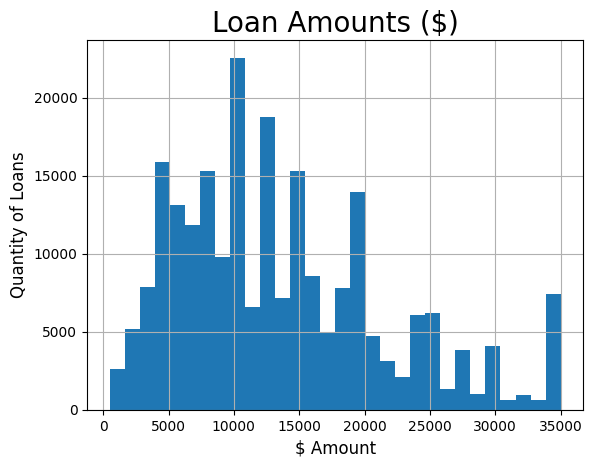

In [ ]:
df_loan['loan_amnt'].hist(bins=30)
plt.title('Loan Amounts ($)', size=20);
plt.xlabel('$ Amount', size= 12);
plt.ylabel('Quantity of Loans', size=12);

There are clearly higher frequencies associated with loan amounts that are multiples of 5,000.

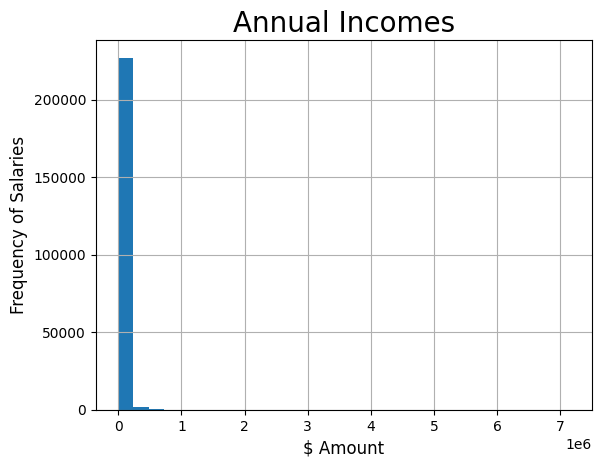

In [ ]:
df_loan['annual_inc'].hist(bins=30)
plt.title('Annual Incomes', size=20);
plt.xlabel('$ Amount', size=12);
plt.ylabel('Frequency of Salaries', size=12);

In [ ]:
df_loan['annual_inc'].min()

1896.0

In [ ]:
df_loan['annual_inc'].max()

7141778.0

It is immediately obvious there is something going on with the annual_inc column, most likely large outliers are present. This results in the absurd graph above, which I will need to investigate further.

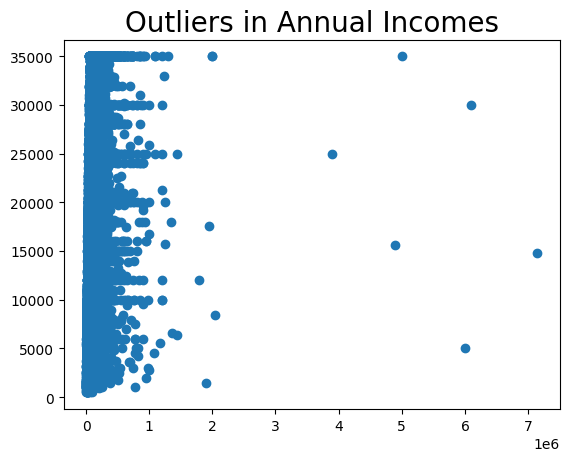

In [ ]:
## SCATTER PLOT OF ANNUAL INCOME TO SHOW OUTLIERS
plt.scatter(df_loan['annual_inc'], df_loan['loan_amnt'])
plt.title('Outliers in Annual Incomes', size=20);

Data Cleaning: Dealing with outliers to improve visualizations

In [ ]:
# capping the annual income at 250000 in order to represent a more normal distribution and remove outliers
loan_scrub = df_loan[df_loan['annual_inc'] <= 250000 ]

In [ ]:
# capping the minimum of annual reported income more than 500 as that data is unreliable
loan_scrub = loan_scrub[loan_scrub['annual_inc']> 500]

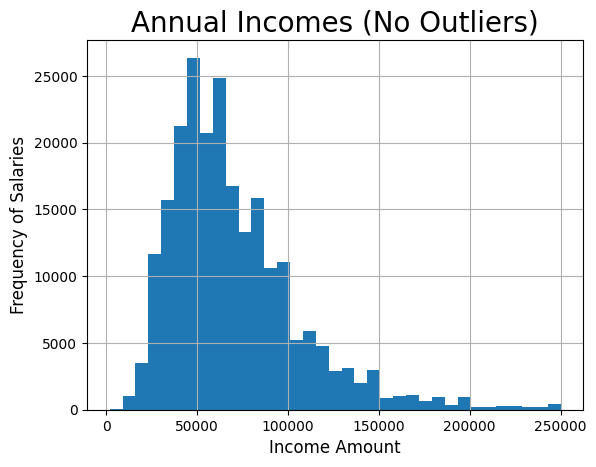

In [ ]:
loan_scrub['annual_inc'].hist(bins=35)
plt.title('Annual Incomes (No Outliers)', size=20);
plt.xlabel('Income Amount', size=12);
plt.ylabel('Frequency of Salaries', size=12);

Looking at Text Fields:
a handful of columns in this dataset are text based and need further investigation in order to determine how to manipulate them so they are more useful. As they are currently object data types we need to find a way to convert this data into numerical information. Two approaches immediately

In [ ]:
df_loan['emp_title'].value_counts()

Teacher                              1652
Manager                              1622
RN                                    715
Registered Nurse                      712
Supervisor                            712
                                     ... 
QUEST DIAGNOSTICS LABORATORY            1
adirondack environmental services       1
Martinrea Heavy Stamping                1
United Heritage Credit Union            1
Server Engineer Lead                    1
Name: emp_title, Length: 129544, dtype: int64

In [ ]:
df_loan['title'].value_counts()

Debt consolidation                        57588
Credit card refinancing                   18483
Debt Consolidation                        10916
Home improvement                           5044
Other                                      4639
                                          ...  
Sensible Woman Seeks Alternative              1
Want to pay off high intrest cards            1
Need surgery/ finish paying off debt          1
Help me pay for a new roof on my house        1
Consolidation 01                              1
Name: title, Length: 46600, dtype: int64

In [ ]:
title = df_loan.pivot_table(index=['title','emp_title'], aggfunc='size')
sort_title = title.sort_values(ascending=False)
head_title = sort_title.head(10).to_frame()
head_title.info

<bound method DataFrame.info of                                             0
title                   emp_title            
Debt consolidation      Manager           834
                        Teacher           815
                        Supervisor        378
                        RN                374
                        Registered Nurse  368
                        Project Manager   283
Credit card refinancing Teacher           281
Debt consolidation      Sales             278
Credit card refinancing Manager           270
Debt consolidation      manager           260>

In [ ]:
df_loan['desc'].value_counts()

                                                                                                                                                                                                                                                                      230
Debt Consolidation                                                                                                                                                                                                                                                     12
Camping Membership                                                                                                                                                                                                                                                      8
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                     

Additional Data Cleaning

In [ ]:
#i wrote a function to automate the dropping of rows that contain NaN in columns which had 2000 or less NaN

def drop_na(df):
    cols=df_loan.columns
    subset=[]
    for i in cols:
        #check number of missing values
        missing_vals = df[i].isnull().sum()
        #if less than 2000 na, drop the rows containing na
        if missing_vals <= 2000:
            subset.append(i)
            
        df.dropna(subset=subset,inplace=True)
        print(f'finished checking column  "{i}"')
    print('FINISHED ALL!')

drop_na(df_loan)

finished checking column  "loan_amnt"
finished checking column  "funded_amnt"
finished checking column  "funded_amnt_inv"
finished checking column  "term"
finished checking column  "int_rate"
finished checking column  "installment"
finished checking column  "grade"
finished checking column  "emp_title"
finished checking column  "emp_length"
finished checking column  "home_ownership"
finished checking column  "annual_inc"
finished checking column  "verification_status"
finished checking column  "issue_d"
finished checking column  "pymnt_plan"
finished checking column  "desc"
finished checking column  "purpose"
finished checking column  "title"
finished checking column  "addr_state"
finished checking column  "dti"
finished checking column  "delinq_2yrs"
finished checking column  "earliest_cr_line"
finished checking column  "inq_last_6mths"
finished checking column  "open_acc"
finished checking column  "pub_rec"
finished checking column  "revol_bal"
finished checking column  "revol_util"


In [ ]:
df_loan.isnull().sum().sort_values(ascending=False)

desc                          140666
emp_title                       4343
revol_util                      3983
collections_12_mths_ex_med      3901
open_acc                        3801
acc_now_delinq                  3800
delinq_2yrs                     3799
total_acc                       3798
earliest_cr_line                3797
pub_rec                         3797
inq_last_6mths                  3796
out_prncp                       3774
out_prncp_inv                   3773
last_pymnt_amnt                 3773
dti                             3773
addr_state                      3772
application_type                3772
revol_bal                       3771
recoveries                      3771
collection_recovery_fee         3771
title                           3761
purpose                         3746
loan_amnt                          0
funded_amnt                        0
pymnt_plan                         0
issue_d                            0
verification_status                0
a

In [ ]:
df_loan['emp_title'].fillna(" . ", inplace= True)

In [ ]:
df_loan['title'].fillna(" . ", inplace= True)

In [ ]:
df_loan['desc'].fillna(" . ", inplace= True)

In [ ]:
df_loan.shape

(229258, 36)

Reviewing Data Types

In [ ]:
df_loan.dtypes.value_counts()

object     30
int64       3
float64     3
dtype: int64

In [ ]:
object_cols = df_loan.select_dtypes(include='object').columns

In order to feed the dates into my model, I need to convert the above 2 columns 'issue_d' and 'earliest_cr_line' to DateTime and then generating a new column for the difference. This difference is a proxy for their creditworthiness, or at least one element of the equation, in which the amount of history with creditors is available for analysis.

In [ ]:
df_loan['issue_d'].head()

0    01 December 2011
1    01 December 2011
2    01 December 2011
3    01 December 2011
5    01 December 2011
Name: issue_d, dtype: object

In [ ]:
df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'])

In [ ]:
df_loan['earliest_cr_line'].head()

0     01 January 1985
1       01 April 1999
2    01 November 2001
3    01 February 1996
5    01 November 2004
Name: earliest_cr_line, dtype: object

In [ ]:
df_loan['earliest_cr_line'] = pd.to_datetime(df_loan['earliest_cr_line'], errors ='coerce')

In [ ]:
df_loan  = df_loan.dropna(subset=['issue_d','earliest_cr_line'])

In [ ]:
# taking the difference of the 2 columns to create length of credit history
df_loan['credit_length_days'] = df_loan['issue_d'] - df_loan['earliest_cr_line']

In [ ]:
df_loan['credit_length_days']

0        9830 days
1        4627 days
2        3682 days
3        5782 days
5        2586 days
            ...   
466276   7001 days
466277   5663 days
466278   4232 days
466281   6058 days
466283   3987 days
Name: credit_length_days, Length: 225456, dtype: timedelta64[ns]

In [ ]:
#extracting just the days out of the timedate format
df_loan['credit_length_days'] = df_loan['credit_length_days'].dt.days

In [ ]:
df_loan['credit_length_days']= df_loan['credit_length_days'].astype('int64')
df_loan['credit_length_days'].head()

0    9830
1    4627
2    3682
3    5782
5    2586
Name: credit_length_days, dtype: int64

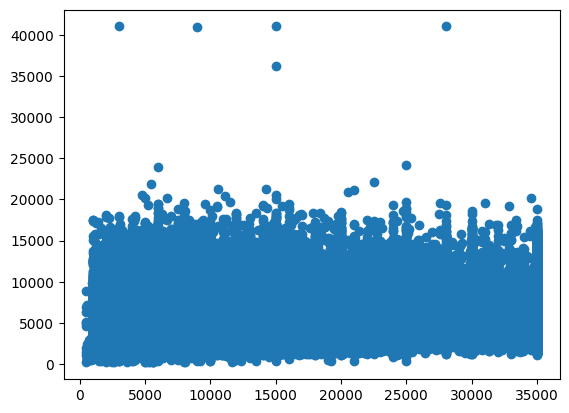

In [ ]:
plt.scatter(df_loan['loan_amnt'], df_loan['credit_length_days'])

In [ ]:
df_loan['credit_length_days'].min()

184

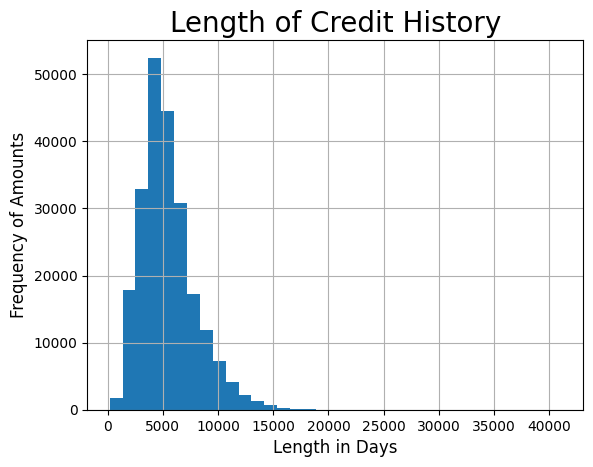

In [ ]:
df_loan['credit_length_days'].hist(bins=35)
plt.title(('Length of Credit History'), size = 20);
plt.xlabel('Length in Days', size = 12);
plt.ylabel('Frequency of Amounts', size = 12);

In [ ]:
df_loan['credit_length_days'].mean()

5461.124370165354

In [ ]:
df_loan['annual_inc'].mean()

72923.66701657973

In [ ]:
df_loan.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)

As seen in the cell above, we need to strip out "days" from each piece of information to convert the datatype from timedelta64 to something that can be interpreted by the classification models.

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225456 entries, 0 to 466283
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   225456 non-null  int64  
 1   funded_amnt                 225456 non-null  int64  
 2   funded_amnt_inv             225456 non-null  object 
 3   term                        225456 non-null  object 
 4   int_rate                    225456 non-null  float64
 5   installment                 225456 non-null  float64
 6   grade                       225456 non-null  object 
 7   emp_title                   225456 non-null  object 
 8   emp_length                  225456 non-null  object 
 9   home_ownership              225456 non-null  object 
 10  annual_inc                  225456 non-null  float64
 11  verification_status         225456 non-null  object 
 12  pymnt_plan                  225456 non-null  object 
 13  desc          

In [ ]:
df_loan['revol_util'] = df_loan['revol_util'].fillna(0)
df_loan['collections_12_mths_ex_med'] = df_loan['collections_12_mths_ex_med'].fillna(0)
df_loan['open_acc'] = df_loan['open_acc'].fillna(0)
df_loan['acc_now_delinq'] = df_loan['acc_now_delinq'].fillna(0)
df_loan['out_prncp_inv'] = df_loan['out_prncp_inv'].fillna(0)
df_loan['delinq_2yrs'] = df_loan['delinq_2yrs'].fillna(0)

In [ ]:
df_loan.isnull().sum().sort_values(ascending=False)

loan_amnt                     0
out_prncp_inv                 0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
recoveries                    0
delinq_2yrs                   0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
classes                       0
inq_last_6mths                0
dti                           0
funded_amnt                   0
emp_length                    0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
home_ownership                0
addr_state                    0
annual_inc                    0
verification_status           0
pymnt_plan                    0
desc    

In [ ]:
df_loan.dtypes.value_counts()

object     28
int64       4
float64     3
dtype: int64

<Axes: title={'center': 'Percetage of Loan Data Type'}, ylabel='counts'>

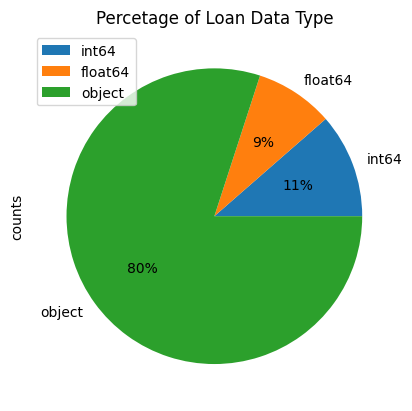

In [ ]:
df_type = df_loan.dtypes.value_counts(normalize=True).rename_axis('type').to_frame('counts')
df_type.groupby(['type']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%', title='Percetage of Loan Data Type')

In [ ]:
df_loan.to_csv('cleaned_loan_data.csv', index=False)

FEATURE ENGINEERING

Import Data

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [ ]:
df_loan2 = pd.read_csv('cleaned_loan_data.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8936\4286713740.py:1: DtypeWarning: Columns (17,19,20,21,24,25,27,29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan2 = pd.read_csv('cleaned_loan_data.csv')


Check Data Types

In [ ]:
df_loan2.dtypes.value_counts()

object     22
float64     9
int64       4
dtype: int64

<Axes: title={'center': 'Percetage of Loan Data Type'}, ylabel='counts'>

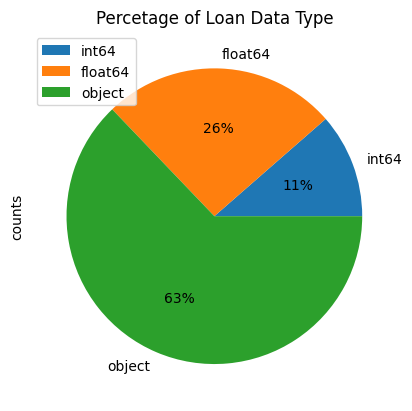

In [ ]:
df_type2 = df_loan2.dtypes.value_counts(normalize=True).rename_axis('type').to_frame('counts')
df_type2.groupby(['type']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%', title='Percetage of Loan Data Type')


In [ ]:
object_cols = df_loan2.select_dtypes(include='object').columns
object_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'out_prncp', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq'],
      dtype='object')

The following features will be binarized: term, verification_status, pyment_plan, application_type, hardship_flag, disbursement_method and debt_settlement_flag.

The following features will be one-hot encoded: home_ownership, purpose and addr_state.

The following features will be encoded with ordinal rank: emp_length and grade.

The text columns of desc, emp_title and title will each be measured by length, then combined into one feature for potential Natural Language Processing work.

The remaining text columns of issue_d and earliest_cr_line will be converted into DateTime format, then create a new column from their difference that will be converted into an integer.

In [ ]:
df_loan2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'classes', 'credit_length_days'],
      dtype='object')

User-Submitted Text Features used to build an aggregate column of all text input

In [ ]:
desc_length = []

[desc_length.append(len(i)) for i in df_loan2.desc]
    
df_loan2["desc_length"]= desc_length

In [ ]:
df_loan2['desc_length'].head()

0     78
1    590
2      3
3    180
4      3
Name: desc_length, dtype: int64

In [ ]:
df_loan2['all_text'] = df_loan2['desc'] + " " + df_loan2['emp_title'] + " " + df_loan2['title']

In [ ]:
df_loan2['all_text'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                          .   .  real estate business
3      Borrower added on 12/21/11 > to pay for prop...
4     .  Veolia Transportaton My wedding loan I pro...
Name: all_text, dtype: object

Using List Comprehension, measure the lengths of each item dealing with user text input and return that as a new column

In [ ]:
all_text_length = [len(i) for i in df_loan2['all_text']]
    
df_loan2["all_text_length"] = all_text_length

In [ ]:
df_loan2['all_text_length'].value_counts()

38      6570
39      6157
37      6139
30      5915
35      5620
        ... 
1683       1
2125       1
3599       1
2578       1
1999       1
Name: all_text_length, Length: 2024, dtype: int64

In [ ]:
df_loan2.emp_title.head()

0                      . 
1                   Ryder
2                      . 
3     AIR RESOURCES BOARD
4    Veolia Transportaton
Name: emp_title, dtype: object

In [ ]:
desc_length = [len(i) for i in df_loan2.desc]
    
df_loan2["desc_length"]= desc_length

In [ ]:
emp_title_length = [len(i) for i in df_loan2.emp_title]

df_loan2["emp_title_length"] = emp_title_length

In [ ]:
title_length = [len(i) for i in df_loan2.title]
    
df_loan2["title_length"] = title_length

Ordinal Rankings: converting grade G:1 to A:7

In [ ]:
#building a dictionary of values to identify and replace grade-  G:1 to A:7
length_dict = {'A':7,
               'B': 6,               
               'C': 5,
               'D': 4,
               'E': 3,
               'F': 2,
               'G': 1,}
df_loan2['grade'].replace(length_dict, inplace=True)

In [ ]:
df_loan2['grade'].head()

0    6
1    5
2    5
3    5
4    7
Name: grade, dtype: int64

Next, employment length needs to be converted from strings to integers that represent the ordinal ranking of the values. First we need to convert less than 1 years to 0, then more than 10 years to 10. Although this is not a perfectly representative scale, it is good enough for our purposes.

In [ ]:
#building a dictionary of values to identify and replace
length_dict = {'10+ years':10,
        '2 years': 2,
        '< 1 year': 0,
        '3 years': 3,
        '1 year': 1,
        '5 years': 5,
        '4 years': 4,
        '6 years': 6,
        '8 years': 8,
        '7 years': 7,
        '9 years': 9}
df_loan2['emp_length'].replace(length_dict, inplace=True)

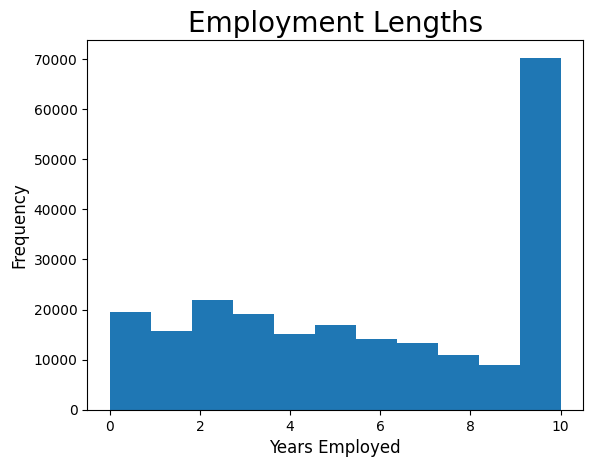

In [ ]:
plt.hist(df_loan2['emp_length'], bins=11)
plt.title('Employment Lengths', size=20);
plt.xlabel('Years Employed', size=12);
plt.ylabel('Frequency', size=12);

In [ ]:
df_loan2['emp_length'].value_counts(normalize=True)

10    0.311613
2     0.097034
0     0.086527
3     0.084447
5     0.075190
1     0.069765
4     0.066749
6     0.062278
7     0.058717
8     0.048440
9     0.039240
Name: emp_length, dtype: float64

In [ ]:
df_loan2['emp_length'].mean()

5.801615392803917

In [ ]:
# Find the mean employment length of people whose loans did or did not succeed.

succed_or_not = df_loan2.groupby(by='classes')['emp_length'].mean()

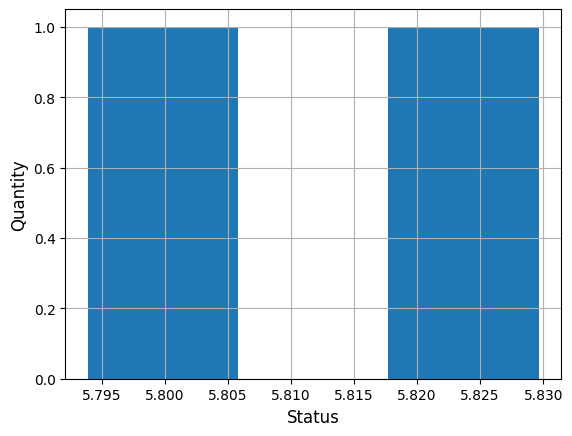

In [ ]:
succed_or_not.hist(bins=3)
plt.xlabel('Status', size= 12);
plt.ylabel('Quantity', size=12);

One-Hot Encoding
- purpose
- verification_status
- addr_state
- pymnt_plan
- initial_list_status
- application_type
- hardship_flag
- disbursement_method
- debt_settlement_flag

In [ ]:
len(df_loan2.columns)

40

In [ ]:
## all remaining object cols
object_cols

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'out_prncp', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq'],
      dtype='object')

In [ ]:
df_loan2['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     36 months
Name: term, dtype: object

Purpose

In [ ]:
df_loan2['purpose'].value_counts()

debt_consolidation    132235
credit_card            44876
home_improvement       12966
other                  12763
major_purchase          5611
small_business          4503
car                     3296
medical                 2528
wedding                 1893
moving                  1761
house                   1447
vacation                1342
renewable_energy         234
7115                       1
Name: purpose, dtype: int64

In [ ]:
df_loan2.groupby(by='classes')['purpose'].value_counts(normalize= True)

classes  purpose           
0        debt_consolidation    0.616198
         credit_card           0.174534
         other                 0.063027
         home_improvement      0.050311
         small_business        0.029775
         major_purchase        0.018355
         medical               0.011708
         car                   0.009301
         moving                0.008601
         house                 0.006255
         vacation              0.005556
         wedding               0.005412
         renewable_energy      0.000967
1        debt_consolidation    0.578368
         credit_card           0.205781
         home_improvement      0.059488
         other                 0.054846
         major_purchase        0.026682
         small_business        0.017279
         car                   0.016081
         medical               0.011077
         wedding               0.009216
         moving                0.007594
         house                 0.006463
         vac

In [ ]:
# how to better visualize these representations?
one_hot = ['purpose', 'term',
'verification_status',
'pymnt_plan',
'application_type', 'addr_state', 'home_ownership']

In [ ]:
df_loan2 = pd.get_dummies(data= df_loan2, columns = one_hot, drop_first=True)

In [ ]:
df_loan2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'emp_title', 'emp_length', 'annual_inc', 'desc',
       ...
       'addr_state_VT', 'addr_state_WA', 'addr_state_WI', 'addr_state_WV',
       'addr_state_WY', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object', length=111)

In [ ]:
len(df_loan2.columns)

111

Interaction Features

In [ ]:
dataCorr = df_loan2.corr(method='pearson')
dataCorr = dataCorr[abs(dataCorr) >= 0.8].stack().reset_index()
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8936\3865151754.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataCorr = df_loan2.corr(method='pearson')


In [ ]:
# filtering out lower/upper triangular duplicates 
dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)

In [ ]:
dataCorr = pd.DataFrame(dataCorr)

dataCorr.columns=['Initial', 'Secondary', 'Corr_Values']
#generate absolute value of corr values
dataCorr['Abs_Corr_Values'] = abs(dataCorr['Corr_Values'])
# initial_cols = list(dataCorr['Initial'])

# secondary_cols = list(dataCorr['Secondary'])

In [ ]:
dataCorr = dataCorr.sort_values(by= 'Abs_Corr_Values', ascending = False)
dataCorr = dataCorr.iloc[6:]
dataCorr

,Initial,Secondary,Corr_Values,Abs_Corr_Values
11,funded_amnt_inv,installment,0.950533,0.950533
13,int_rate,grade,-0.945141,0.945141
54,application_type_1,application_type_INDIVIDUAL,-0.894425,0.894425
25,revol_util,addr_state_260xx,0.886235,0.886235
113,home_ownership_MORTGAGE,home_ownership_RENT,-0.847678,0.847678


In order to deal with the autocorrelation and high colinearity, I will be creating new columns for the features that exhibit high correlations with one another.

In [ ]:
for i,j in zip(dataCorr['Initial'], dataCorr['Secondary']):
    name = i + '*' + j  
    df_loan2[name] = df_loan2[i] * df_loan2[j]
    print(name)

funded_amnt_inv*installment
int_rate*grade
application_type_1*application_type_INDIVIDUAL
revol_util*addr_state_260xx
home_ownership_MORTGAGE*home_ownership_RENT


In [ ]:
#all of the values in this column are 0 since they are non-overlapping binary values
df_loan2.drop(columns = ['home_ownership_MORTGAGE*home_ownership_RENT', 'funded_amnt', 'funded_amnt_inv'], inplace= True)

In [ ]:
len(df_loan2.columns)

113

In [ ]:
df_loan2.head()

,loan_amnt,int_rate,installment,grade,emp_title,emp_length,annual_inc,desc,title,dti,...,addr_state_WY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,funded_amnt_inv*installment,int_rate*grade,application_type_1*application_type_INDIVIDUAL,revol_util*addr_state_260xx
0,5000,10.65,162.87,6,.,10,24000.0,Borrower added on 12/22/11 > I need to upgra...,Computer,27.65,...,0,0,0,0,0,1,810278.25,63.90,0,0.0
1,2500,15.27,59.83,5,Ryder,0,30000.0,Borrower added on 12/22/11 > I plan to use t...,bike,1.0,...,0,0,0,0,0,1,149575.00,76.35,0,0.0
2,2400,15.96,84.33,5,.,10,12252.0,.,real estate business,8.72,...,0,0,0,0,0,1,202392.00,79.80,0,0.0
3,10000,13.49,339.31,5,AIR RESOURCES BOARD,10,49200.0,Borrower added on 12/21/11 > to pay for prop...,personel,20.0,...,0,0,0,0,0,1,3393100.00,67.45,0,0.0
4,5000,7.90,156.46,7,Veolia Transportaton,3,36000.0,.,My wedding loan I promise to pay back,11.2,...,0,0,0,0,0,1,782300.00,55.30,0,0.0


In [ ]:
df_loan2.shape

(225456, 113)

In [ ]:
df_loan2.to_csv('cleaned_loan_data_features.csv', index=False)

MODELLING DATA

Import Data

In [ ]:
#instantiate Logistic Regression and get up and running by the end of the day
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import sklearn elements
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, r2_score, f1_score
from sklearn.ensemble import RandomForestClassifier

#import xgboost
from xgboost import XGBClassifier

Read Data

In [ ]:
#read in file from csv to dataframe
df_loan3 = pd.read_csv('cleaned_loan_data_features.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15012\453369270.py:2: DtypeWarning: Columns (9,11,12,13,16,17,19,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan3 = pd.read_csv('cleaned_loan_data_features.csv')


In [ ]:
num_cols = df_loan3.select_dtypes(include=('int64', 'float64')).columns

In [ ]:
list(num_cols)

['loan_amnt',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'annual_inc',
 'delinq_2yrs',
 'revol_bal',
 'revol_util',
 'out_prncp_inv',
 'collection_recovery_fee',
 'classes',
 'credit_length_days',
 'desc_length',
 'all_text_length',
 'emp_title_length',
 'title_length',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_medical',
 'purpose_moving',
 'purpose_other',
 'purpose_renewable_energy',
 'purpose_small_business',
 'purpose_vacation',
 'purpose_wedding',
 'term_ 60 months',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'pymnt_plan_y',
 'application_type_1',
 'application_type_INDIVIDUAL',
 'addr_state_260xx',
 'addr_state_2825',
 'addr_state_327xx',
 'addr_state_554xx',
 'addr_state_AK',
 'addr_state_AL',
 'addr_state_AR',
 'addr_state_AZ',
 'addr_state_CA',
 'addr_state_CO',
 'addr_state_CT',
 'addr_state_DC',
 'addr_state_DE',
 'addr_s

In [ ]:
df_loan3.dtypes.value_counts()

int64      88
object     14
float64    11
dtype: int64

<Axes: title={'center': 'Percetage of Loan Data Type'}, ylabel='counts'>

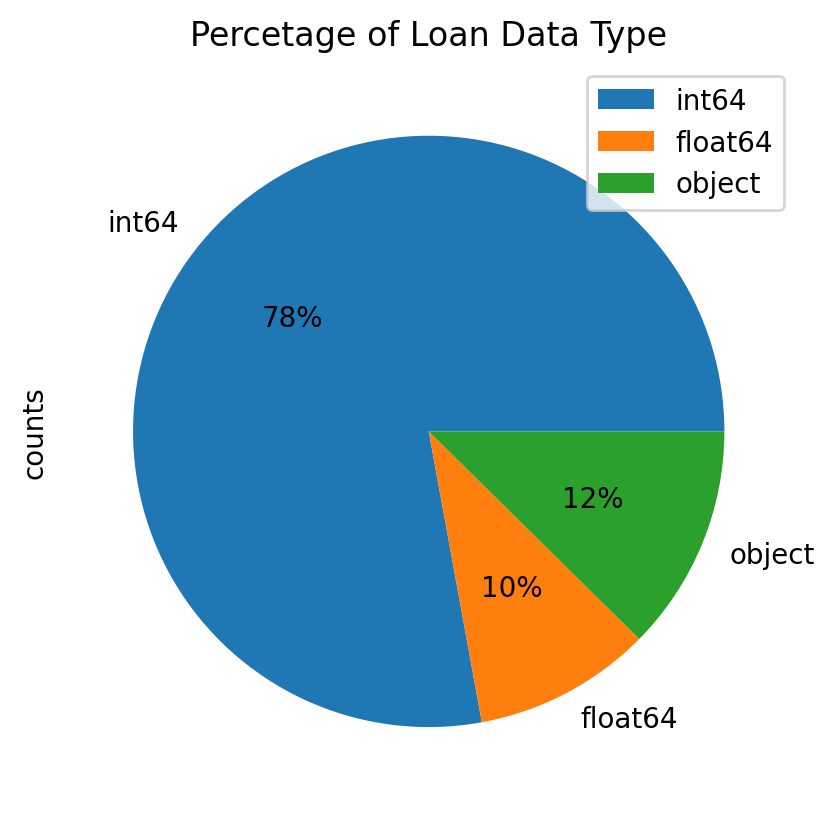

In [ ]:
df_type3 = df_loan3.dtypes.value_counts(normalize=True).rename_axis('type').to_frame('counts')
df_type3.groupby(['type']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%', title='Percetage of Loan Data Type')

Defining Inputs

In [ ]:
X = df_loan3[num_cols].drop(columns='classes')
y = df_loan3['classes']

In [ ]:
X.dtypes.value_counts()

int64      87
float64    11
dtype: int64

In [ ]:
# Create training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=420,
                                                    stratify = y)

In [ ]:
X_train.shape

(157819, 98)

In [ ]:
y_train.shape

(157819,)

Functions

In [ ]:
def metrics(model):
    preds          = model.predict(X_test) #generate predictions
    
    test_conf      = confusion_matrix(y_test,# True values.
                                  preds) # Predicted values.
    
    tn, fp, fn, tp = test_conf.ravel() #unravel values to use in metrics
    
    accuracy       = accuracy_score(y_test, preds)
    print("Accuracy score: %.2f%%" % (accuracy * 100.0))

    recall         = recall_score(y_test, preds)
    print("Recall score: %.2f%%" % (recall * 100.0))

    precision      = precision_score(y_test, preds)
    print("Precision score: %.2f%%" % (precision * 100.0))

    specificity    = tn / (tn+fp)
    specificity    = specificity * 100.0
    print(f"Specificity score: {round((specificity),2)}%")
    
    F1_SCORE        = f1_score(y_test, preds)
    F1_SCORE        = F1_SCORE * 100.0
    print(f'F1 score: {round((F1_SCORE),2)}%')
    
    df_conf= pd.DataFrame(test_conf, index =  ['Actual Failure', 'Actual Success'],
                    columns = ['Predicted Failure', 'Predicted Success'])
    return(df_conf)

In [ ]:
def cv_score(model):
    cv_train = cross_val_score(model, X_train, y_train, cv=3).mean()
    cv_test = cross_val_score(model, X_test, y_test, cv=3).mean()
    print(f'Mean CV Score for Training: {cv_train}')
    print(f'Mean CV Score for Testing: {cv_test}')

In [ ]:
avg_rate = df_loan3['int_rate'].mean()
avg_rate = round((avg_rate),2)
print(f'The Average Interest Rate is: {avg_rate}%')

avg_loan = df_loan3['loan_amnt'].mean()
avg_loan = round((avg_loan),2)
print(f'The Average Loan amount is: {avg_loan}$')

The Average Interest Rate is: 13.87%
The Average Loan amount is: 13605.9$


Modeling: Logistic Regression with the assumptions:

Linearity: The independent variables X1, . . . , Xm are linearly related to the logit of the probability that Y = 1 or, equivalently, the log-odds that Y = 1.
Independence of Errors: The observations y1, . . . , yn are independent of one another.
Distribution of Errors: Each observation yi follows a Bernoulli distribution with probability of success pi.
Independence of Independent Variables: The independent variables X1, . . . , Xm are independent of one another.

In [ ]:
# Step 1: Instantiate our model.
logreg = LogisticRegression(solver='liblinear')

# Step 2: Fit our model.
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#return the intercept and coefficients
print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [1.72434283e-06]
Logistic Regression Coefficient: [[ 1.35825062e-05 -1.46696109e-05  2.69471287e-04  2.05827706e-05
   4.67508117e-06  1.49367582e-05 -8.30049225e-07 -3.32504919e-06
   8.74727281e-06 -1.36809181e-03 -1.43841695e-03  8.49222755e-05
   2.99045848e-04  3.79724387e-04  4.17460534e-05  3.54838003e-05
   1.23889563e-07  9.57787025e-07  6.65890122e-07  6.35448292e-08
   1.20985100e-08  1.60910281e-07 -8.92695756e-09 -8.97325022e-09
  -9.54415024e-08  2.16968528e-09 -2.26198447e-07  9.10928726e-09
   6.84836870e-08 -2.56129653e-06 -8.57160369e-08 -3.39408149e-07
   1.18313527e-11  1.27104012e-11  1.72433012e-06  2.80018941e-12
   0.00000000e+00  4.84282612e-12  5.06738567e-12  1.54944567e-08
  -1.05793446e-08  5.38657856e-09  6.21606756e-08  4.29129824e-07
   1.17812259e-07  3.26401532e-08  2.72763266e-08 -2.42692325e-10
  -2.96593915e-08  7.33369899e-08  1.10457839e-08  2.23487226e-11
   3.60333205e-10  1.05189169e-07 -3.02814139e-08  3.56662484

In [ ]:
#how to visualize these results?
print(f'Logistic Regression train score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression test score: {logreg.score(X_test, y_test)}')

Logistic Regression train score: 0.8254012507999671
Logistic Regression test score: 0.8244599849194967


In [ ]:
cv_score(logreg)

Mean CV Score for Training: 0.8213269560057315
Mean CV Score for Testing: 0.8216657531305801


In [ ]:
metrics(logreg)

Accuracy score: 82.45%
Recall score: 99.99%
Precision score: 81.72%
Specificity score: 18.6%
F1 score: 89.94%


,Predicted Failure,Predicted Success
Actual Failure,2711,11868
Actual Success,5,53053


Validation of logistic regression model

In [ ]:
y_pred_proba_logreg = logreg.predict_proba(X_test)[:][:,1]

df_actual_predicted_logreg = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_logreg, columns=['y_pred_proba'])], axis=1)
df_actual_predicted_logreg.index = y_test.index

AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

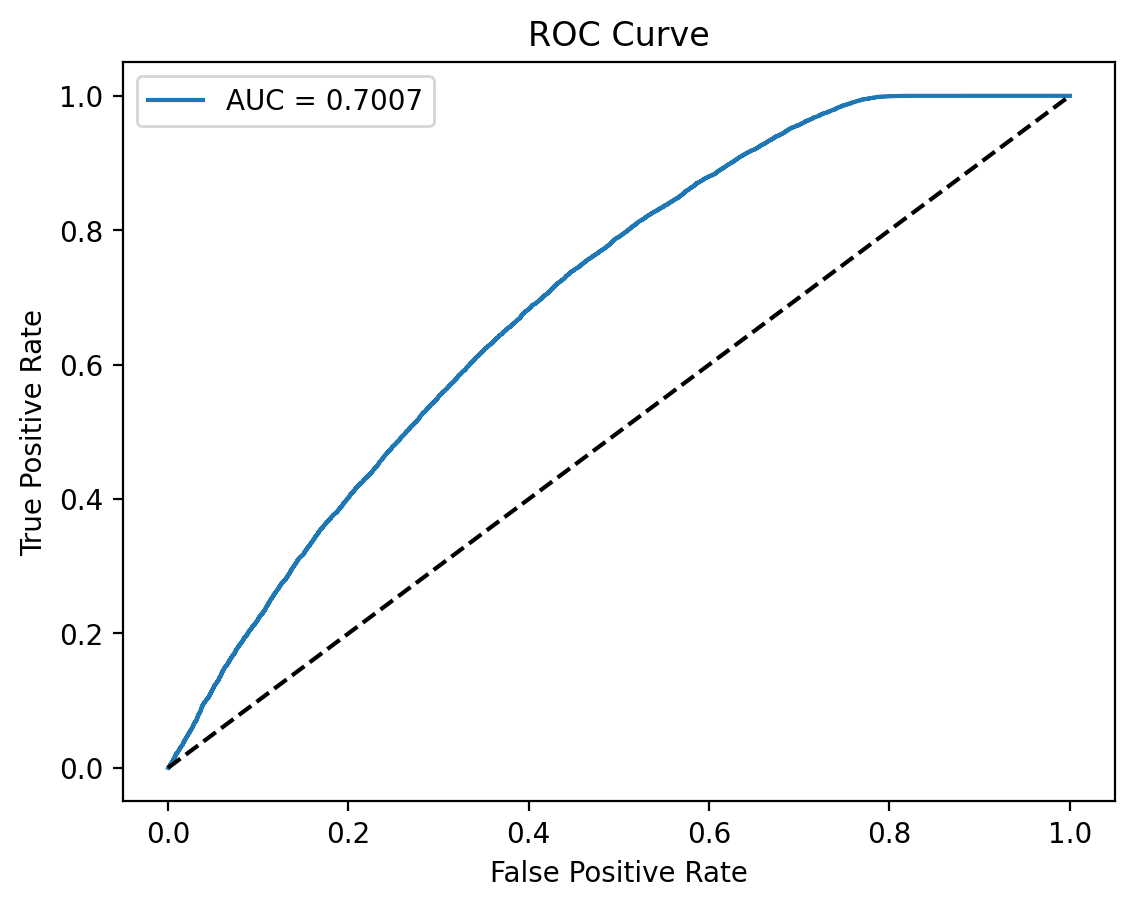

In [ ]:
fpr_logreg, tpr_logreg, tr_logreg = roc_curve(df_actual_predicted_logreg['y_actual'], df_actual_predicted_logreg['y_pred_proba'])
auc_logreg = roc_auc_score(df_actual_predicted_logreg['y_actual'], df_actual_predicted_logreg['y_pred_proba'])

plt.plot(fpr_logreg, tpr_logreg, label='AUC = %0.4f' %auc_logreg)
plt.plot(fpr_logreg, fpr_logreg, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Kolmogorov-Smirnov (KS)

In [ ]:
df_actual_predicted_logreg = df_actual_predicted_logreg.sort_values('y_pred_proba')
df_actual_predicted_logreg = df_actual_predicted_logreg.reset_index()

df_actual_predicted_logreg['Cumulative N Population'] = df_actual_predicted_logreg.index + 1
df_actual_predicted_logreg['Cumulative N Bad'] = df_actual_predicted_logreg['y_actual'].cumsum()
df_actual_predicted_logreg['Cumulative N Good'] = df_actual_predicted_logreg['Cumulative N Population'] - df_actual_predicted_logreg['Cumulative N Bad']
df_actual_predicted_logreg['Cumulative Perc Population'] = df_actual_predicted_logreg['Cumulative N Population'] / df_actual_predicted_logreg.shape[0]
df_actual_predicted_logreg['Cumulative Perc Bad'] = df_actual_predicted_logreg['Cumulative N Bad'] / df_actual_predicted_logreg['y_actual'].sum()
df_actual_predicted_logreg['Cumulative Perc Good'] = df_actual_predicted_logreg['Cumulative N Good'] / (df_actual_predicted_logreg.shape[0] - df_actual_predicted_logreg['y_actual'].sum())

In [ ]:
df_actual_predicted_logreg.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,161232,0,3.566803e-19,1,0,1,0.000015,0.0,0.000069
1,155893,0,4.617284e-19,2,0,2,0.000030,0.0,0.000137
2,156070,0,8.477795e-19,3,0,3,0.000044,0.0,0.000206
3,154589,0,9.938015e-19,4,0,4,0.000059,0.0,0.000274
4,158377,0,1.611834e-18,5,0,5,0.000074,0.0,0.000343


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.2915')

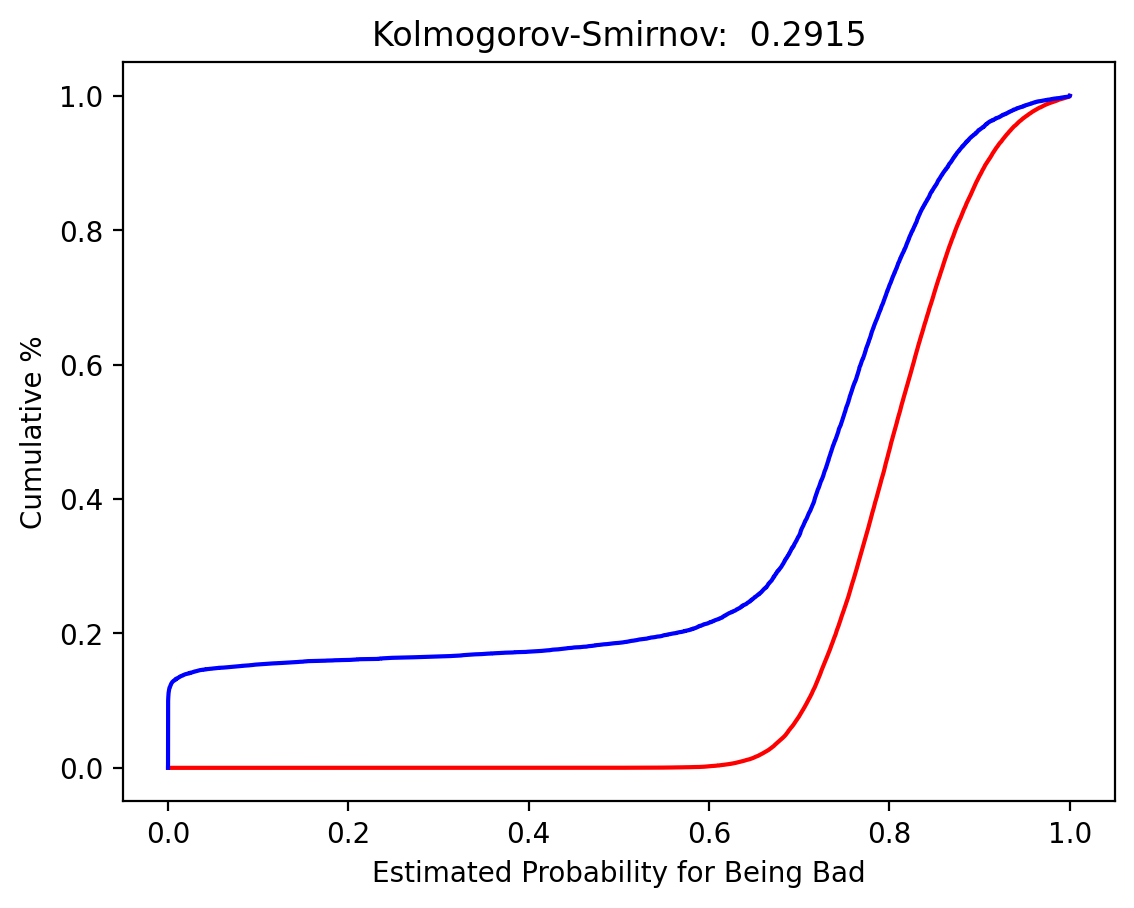

In [ ]:
KS_logreg = max(df_actual_predicted_logreg['Cumulative Perc Good'] - df_actual_predicted_logreg['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_logreg['y_pred_proba'], df_actual_predicted_logreg['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_logreg['y_pred_proba'], df_actual_predicted_logreg['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS_logreg)

The built model produces a performance of `AUC = 0.701` and `KS = 0.292`. In the world of credit risk modeling, generally AUC above 0.7 and KS above 0.3 is considered bad performance.

In [ ]:
df_loan3['classes'].value_counts(normalize=True)

1    0.784446
0    0.215554
Name: classes, dtype: float64

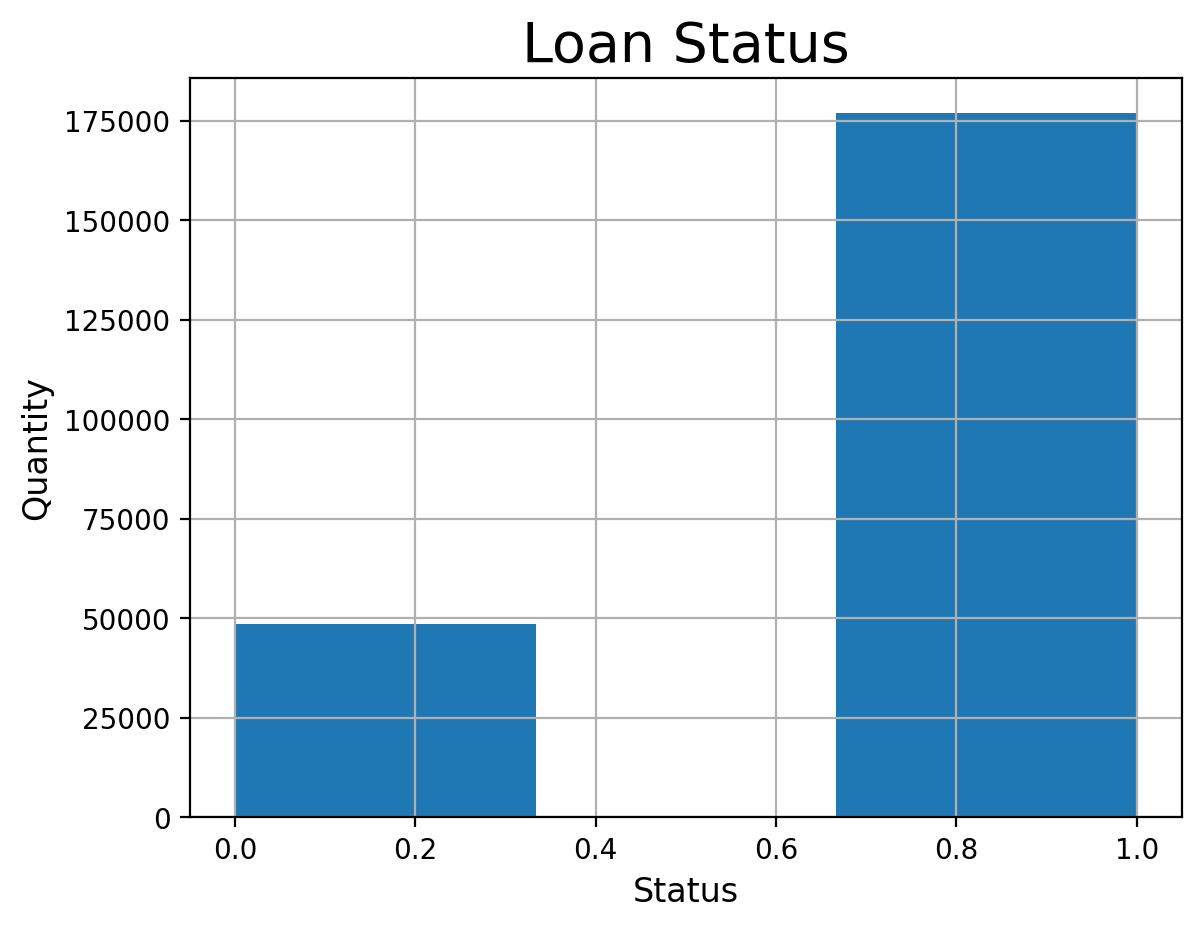

In [ ]:
df_loan3['classes'].hist(bins=3)
plt.title('Loan Status', size=20);
plt.xlabel('Status', size= 12);
plt.ylabel('Quantity', size=12);

Model Interpretation: Logistic Regression

Logistic regression is my initial model, but barely performs better than the class percentage split of 78.44% Success (and 21.55% Failure). This means that for an Accuracy score of 82.45%, it performed better than the split.

The training accuracy and Cross Valuation score came in lower than the testing scores. This indicates that despite all of the features (existing and engineered), the model is not overfit. This means that when observing "new" data it performed better than the training set and theoretically means it is generalizable to other sets of data.

Accuracy isn't necessarily the best metric for my use case as it is the ratio of correctly predicted observations over total observations. The main concern is that bad loans will be perceived as good loans and the investors will lose money on their principal with potential defaults or incomplete repayments. In Confusion Matrix terminology, I am primarily looking to minimize the False Positives. The best metric in that regard is a combination of Specificity and Precision, so 18.6% (abysmal) and 81.72% (not great) are what we are going to be evaluating our next models on.


Modeling: Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth= 5, max_features= 5, n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=5)

In [ ]:
cv_score(rf)

Mean CV Score for Training: 0.7877885235632301
Mean CV Score for Testing: 0.7845557899383362


In [ ]:
print(f'Random Forest train score: {rf.score(X_train, y_train)}')
print(f'Random Forest test score: {rf.score(X_test, y_test)}')

Random Forest train score: 0.7845569925040711
Random Forest test score: 0.7845853600839777


In [ ]:
metrics(rf)

Accuracy score: 78.46%
Recall score: 100.00%
Precision score: 78.46%
Specificity score: 0.06%
F1 score: 87.93%


,Predicted Failure,Predicted Success
Actual Failure,9,14570
Actual Success,0,53058


In [ ]:
feature_importance = pd.Series(data = rf.feature_importances_,
                              index = X.columns)
feature_importance.sort_values(ascending = False)

collection_recovery_fee        0.420772
out_prncp_inv                  0.261336
grade                          0.082994
int_rate                       0.071920
term_ 60 months                0.045418
                                 ...   
addr_state_554xx               0.000000
addr_state_IA                  0.000000
addr_state_ID                  0.000000
addr_state_ME                  0.000000
revol_util*addr_state_260xx    0.000000
Length: 98, dtype: float64

In [ ]:
Validation of Random Forest Model

In [ ]:
y_pred_proba_rf = rf.predict_proba(X_test)[:][:,1]

df_actual_predicted_rf = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_rf, columns=['y_pred_proba'])], axis=1)
df_actual_predicted_rf.index = y_test.index

AUC

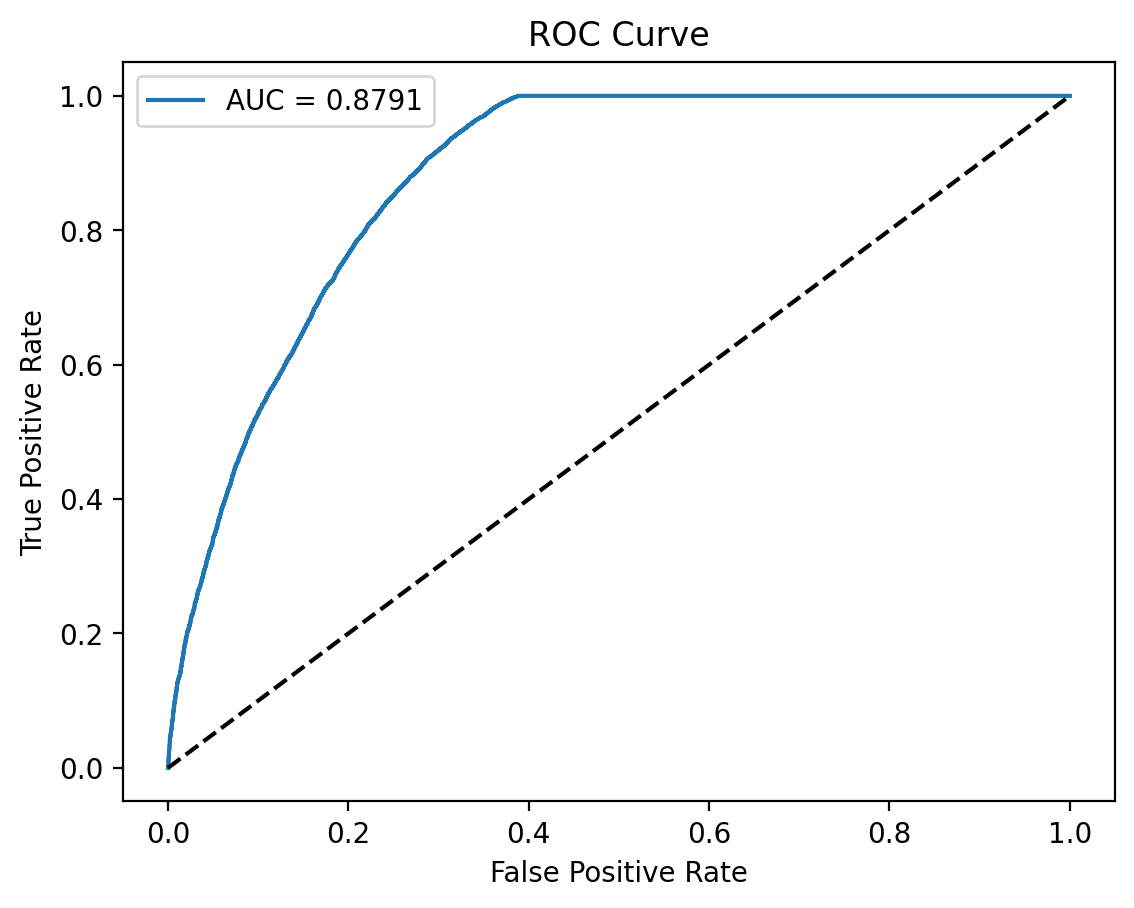

In [ ]:
fpr_rf, tpr_rf, tr_rf = roc_curve(df_actual_predicted_rf['y_actual'], df_actual_predicted_rf['y_pred_proba'])
auc_rf = roc_auc_score(df_actual_predicted_rf['y_actual'], df_actual_predicted_rf['y_pred_proba'])

plt.plot(fpr_rf, tpr_rf, label='AUC = %0.4f' %auc_rf)
plt.plot(fpr_rf, fpr_rf, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [ ]:
df_actual_predicted_rf = df_actual_predicted_rf.sort_values('y_pred_proba')
df_actual_predicted_rf = df_actual_predicted_rf.reset_index()

df_actual_predicted_rf['Cumulative N Population'] = df_actual_predicted_rf.index + 1
df_actual_predicted_rf['Cumulative N Bad'] = df_actual_predicted_rf['y_actual'].cumsum()
df_actual_predicted_rf['Cumulative N Good'] = df_actual_predicted_rf['Cumulative N Population'] - df_actual_predicted_rf['Cumulative N Bad']
df_actual_predicted_rf['Cumulative Perc Population'] = df_actual_predicted_rf['Cumulative N Population'] / df_actual_predicted_rf.shape[0]
df_actual_predicted_rf['Cumulative Perc Bad'] = df_actual_predicted_rf['Cumulative N Bad'] / df_actual_predicted_rf['y_actual'].sum()
df_actual_predicted_rf['Cumulative Perc Good'] = df_actual_predicted_rf['Cumulative N Good'] / (df_actual_predicted_rf.shape[0] - df_actual_predicted_rf['y_actual'].sum())

In [ ]:
df_actual_predicted_rf.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,79444,0,0.440713,1,0,1,0.000015,0.0,0.000069
1,92506,0,0.446591,2,0,2,0.000030,0.0,0.000137
2,159008,0,0.449114,3,0,3,0.000044,0.0,0.000206
3,103450,0,0.450983,4,0,4,0.000059,0.0,0.000274
4,53956,0,0.451089,5,0,5,0.000074,0.0,0.000343


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6233')

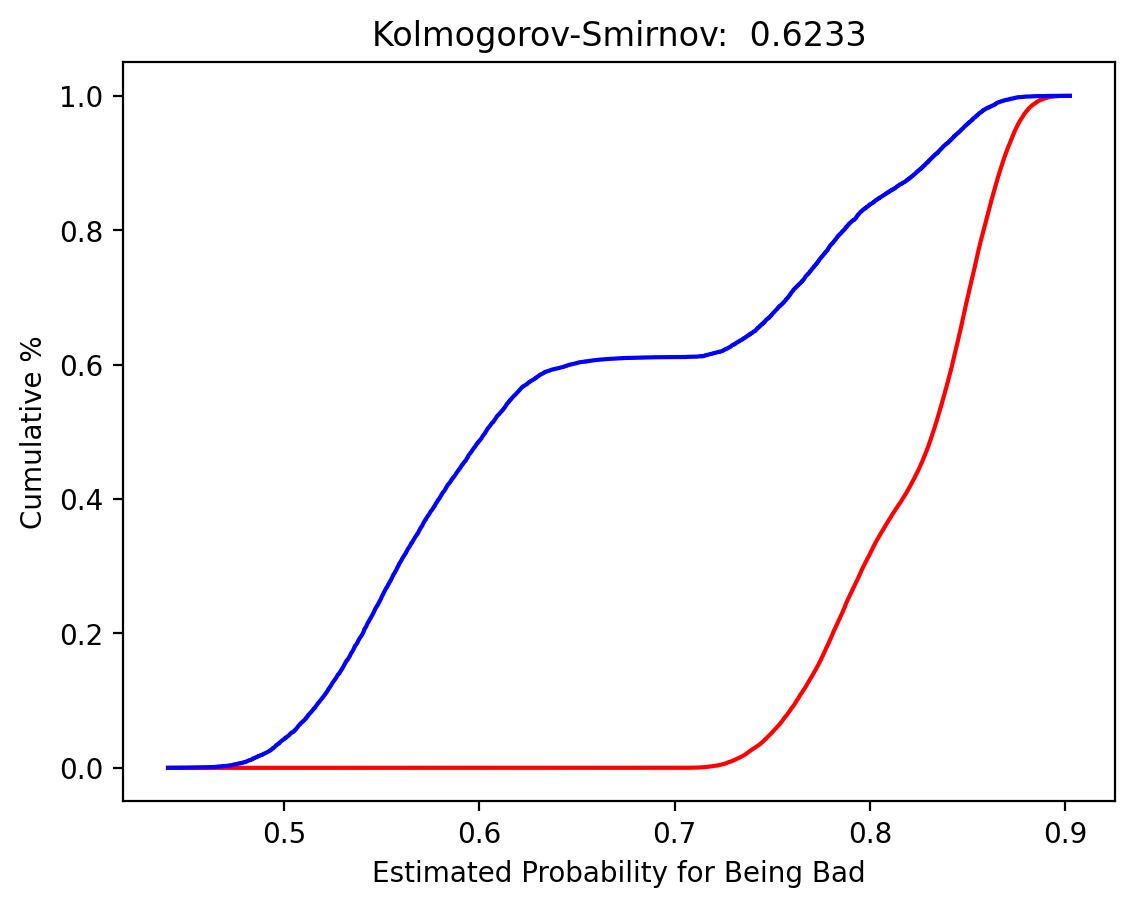

In [ ]:
KS_rf = max(df_actual_predicted_rf['Cumulative Perc Good'] - df_actual_predicted_rf['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_rf['y_pred_proba'], df_actual_predicted_rf['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_rf['y_pred_proba'], df_actual_predicted_rf['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS_rf)

The built model produces a performance of `AUC = 0.879` and `KS = 0.623`. In the world of credit risk modeling, generally AUC above 0.7 and KS above 0.3 is considered good performance.

Model Interpretation: Random Forest

This model has a perfect Recall score of 100% which is impressive. Despite not being the exact measure we are looking at, this still has relevance to our scenario as it represents potential earnings from interest payments. Since there are no Predicted Failures that ended up being Successes, or False Negatives, this model enables us to minimize losses from potential interest payments on the loans.

There is a larger concern inherent in the 14000 False Positives, or number of Predicted Successes that turned out to be Failures. This represents a much larger financial loss than lost interest payments, as the principal investment is also at risk. In the same vein as the analysis for Logistic Regression, we are looking at a combination of Precision and Specificity- both markedly improving from prior. Additionally, the nominal amount of False Positives is a decrease, from 11000 to 14000, or by 27%


Modeling: XGBoost

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
cv_score(xgb)

Mean CV Score for Training: 0.9183748533917555
Mean CV Score for Testing: 0.9146621194269356


In [ ]:
print(f'XGBoost train score: {xgb.score(X_train, y_train)}')
print(f'XGBoost test score: {xgb.score(X_test, y_test)}')

XGBoost train score: 0.9214479878848555
XGBoost test score: 0.9156674601179827


In [ ]:
metrics(xgb)

Accuracy score: 91.57%
Recall score: 99.84%
Precision score: 90.41%
Specificity score: 61.45%
F1 score: 94.89%


,Predicted Failure,Predicted Success
Actual Failure,8959,5620
Actual Success,84,52974


Validation of XGBoost Model

In [ ]:
y_pred_proba_xgb = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted_xgb = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba_xgb, columns=['y_pred_proba'])], axis=1)
df_actual_predicted_xgb.index = y_test.index

AUC

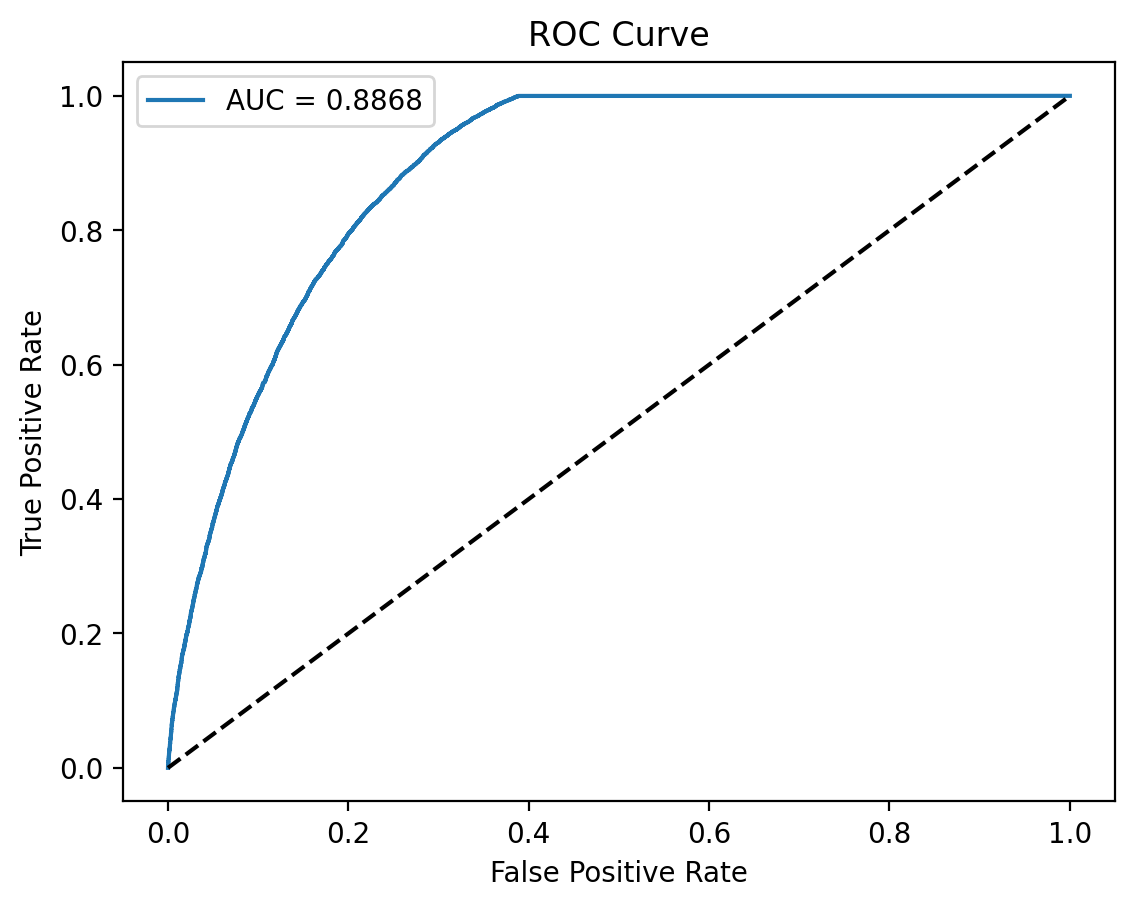

In [ ]:
fpr_xgb, tpr_xgb, tr_xgb = roc_curve(df_actual_predicted_xgb['y_actual'], df_actual_predicted_xgb['y_pred_proba'])
auc_xgb = roc_auc_score(df_actual_predicted_xgb['y_actual'], df_actual_predicted_xgb['y_pred_proba'])

plt.plot(fpr_xgb, tpr_xgb, label='AUC = %0.4f' %auc_xgb)
plt.plot(fpr_xgb, fpr_xgb, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Kolmogorov_Smirnov (KS)

In [ ]:
df_actual_predicted_xgb = df_actual_predicted_xgb.sort_values('y_pred_proba')
df_actual_predicted_xgb = df_actual_predicted_xgb.reset_index()

df_actual_predicted_xgb['Cumulative N Population'] = df_actual_predicted_xgb.index + 1
df_actual_predicted_xgb['Cumulative N Bad'] = df_actual_predicted_xgb['y_actual'].cumsum()
df_actual_predicted_xgb['Cumulative N Good'] = df_actual_predicted_xgb['Cumulative N Population'] - df_actual_predicted_xgb['Cumulative N Bad']
df_actual_predicted_xgb['Cumulative Perc Population'] = df_actual_predicted_xgb['Cumulative N Population'] / df_actual_predicted_xgb.shape[0]
df_actual_predicted_xgb['Cumulative Perc Bad'] = df_actual_predicted_xgb['Cumulative N Bad'] / df_actual_predicted_xgb['y_actual'].sum()
df_actual_predicted_xgb['Cumulative Perc Good'] = df_actual_predicted_xgb['Cumulative N Good'] / (df_actual_predicted_xgb.shape[0] - df_actual_predicted_xgb['y_actual'].sum())

In [ ]:
df_actual_predicted_xgb.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,37391,0,0.000010,1,0,1,0.000015,0.0,0.000069
1,31983,0,0.000010,2,0,2,0.000030,0.0,0.000137
2,33748,0,0.000012,3,0,3,0.000044,0.0,0.000206
3,24989,0,0.000012,4,0,4,0.000059,0.0,0.000274
4,36516,0,0.000012,5,0,5,0.000074,0.0,0.000343


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.6320')

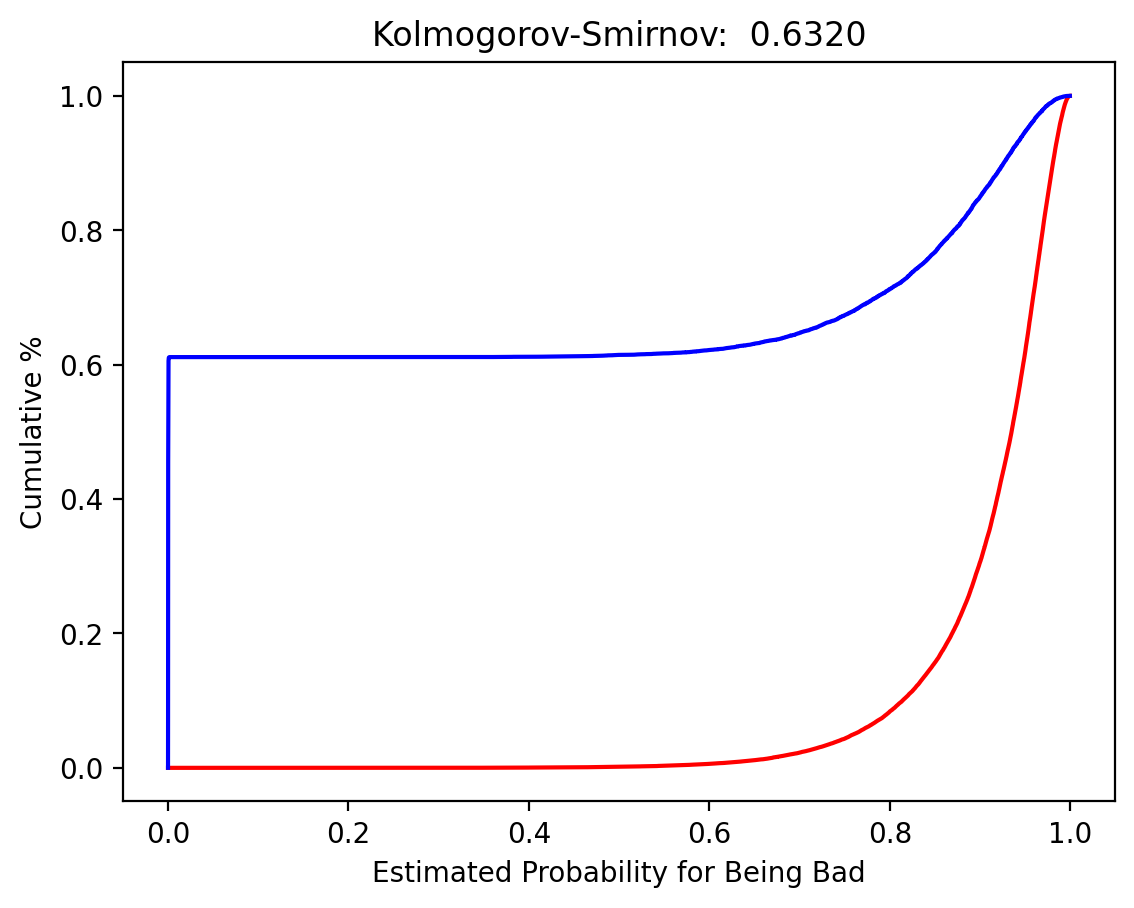

In [ ]:
KS_xgb = max(df_actual_predicted_xgb['Cumulative Perc Good'] - df_actual_predicted_xgb['Cumulative Perc Bad'])

plt.plot(df_actual_predicted_xgb['y_pred_proba'], df_actual_predicted_xgb['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_xgb['y_pred_proba'], df_actual_predicted_xgb['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS_xgb)

The built model produces a performance of `AUC = 0.887` and `KS = 0.632`. In the world of credit risk modeling, generally AUC above 0.7 and KS above 0.3 is considered good performance.

Model Interpretation: XGBoost

My third model is the runaway winner in all metrics, with the sole exception of fit. Our primary indicator of success: minimization of False Positives, is a substantial improvement over the Logistic Regression as well as the Random Forest models. Compared to Logistic Regression, XGBoost has an improvement of 53% and for Random Forest it is an improvement of 62%.

One potential concern is that the quantity of False Negatives are much larger than in both prior models. However, if we consider the financial implication of the difference it is more than covered by the reduction in False Positives.